In [1]:
install.packages("formatR")
install.packages("mapproj")
install.packages("maps")
install.packages("knitr")
install.packages("evaluate")

Installing package into ‘/usr/local/spark-2.4.0-bin-hadoop2.7/R/lib’
(as ‘lib’ is unspecified)
Installing package into ‘/usr/local/spark-2.4.0-bin-hadoop2.7/R/lib’
(as ‘lib’ is unspecified)
also installing the dependency ‘maps’

Installing package into ‘/usr/local/spark-2.4.0-bin-hadoop2.7/R/lib’
(as ‘lib’ is unspecified)
Installing package into ‘/usr/local/spark-2.4.0-bin-hadoop2.7/R/lib’
(as ‘lib’ is unspecified)
also installing the dependencies ‘highr’, ‘markdown’, ‘xfun’

Installing package into ‘/usr/local/spark-2.4.0-bin-hadoop2.7/R/lib’
(as ‘lib’ is unspecified)


In [3]:
# ggplot2 examples
library(ggplot2)
# use color brewer as default discrete colors
scale_colour_discrete <- function(...) scale_color_brewer(palette = "Set1", ...)
scale_fill_discrete <- function(...) scale_fill_brewer(palette = "Set1", ...)

data("mtcars")
# create factors with value labels
mtcars$gear <- factor(mtcars$gear, levels = c(3, 4, 5), labels = c("3gears", "4gears", 
    "5gears"))
mtcars$am <- factor(mtcars$am, levels = c(0, 1), labels = c("Automatic", "Manual"))
mtcars$cyl <- factor(mtcars$cyl, levels = c(4, 6, 8), labels = c("4cyl", "6cyl", 
    "8cyl"))
head(mtcars)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6cyl,160,110,3.90,2.620,16.46,0,Manual,4gears,4
Mazda RX4 Wag,21.0,6cyl,160,110,3.90,2.875,17.02,0,Manual,4gears,4
Datsun 710,22.8,4cyl,108,93,3.85,2.320,18.61,1,Manual,4gears,1
Hornet 4 Drive,21.4,6cyl,258,110,3.08,3.215,19.44,1,Automatic,3gears,1
Hornet Sportabout,18.7,8cyl,360,175,3.15,3.440,17.02,0,Automatic,3gears,2
Valiant,18.1,6cyl,225,105,2.76,3.460,20.22,1,Automatic,3gears,1


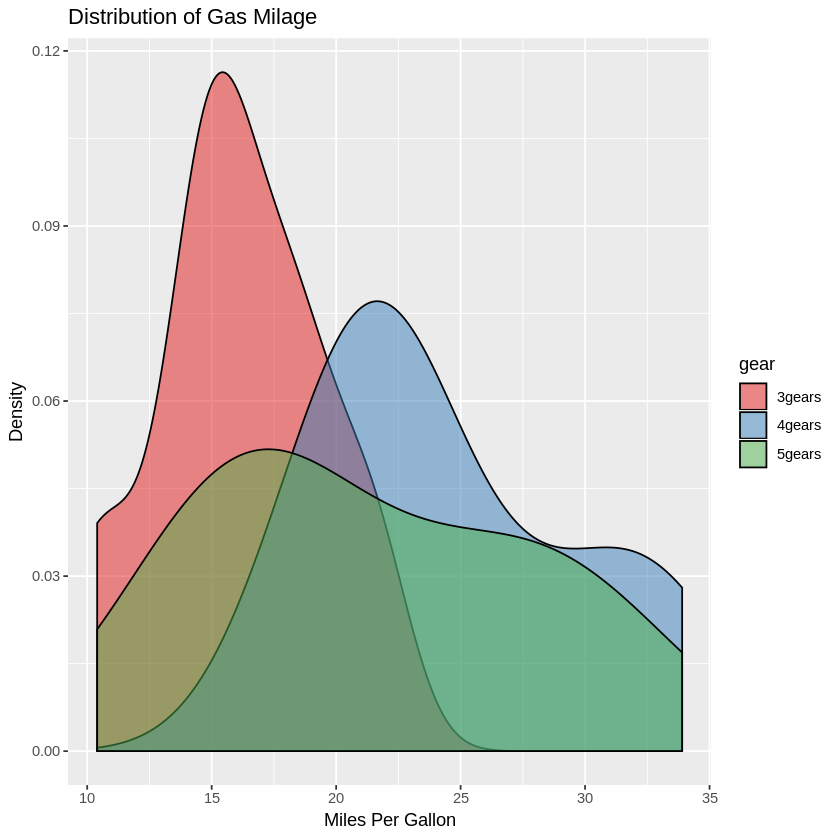

In [4]:
qplot(mpg, data=mtcars, geom="density", fill=gear, alpha=I(.5),
   main="Distribution of Gas Milage", xlab="Miles Per Gallon",
   ylab="Density")

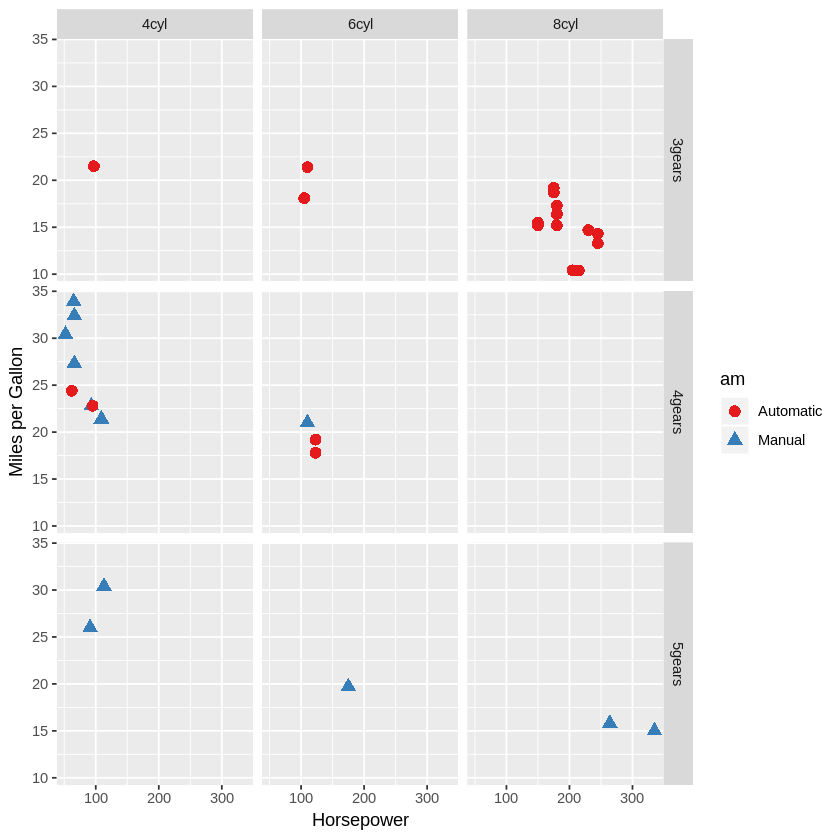

In [5]:
qplot(hp, mpg, data=mtcars, shape=am, color=am,
   facets=gear~cyl, size=I(3),
   xlab="Horsepower", ylab="Miles per Gallon")

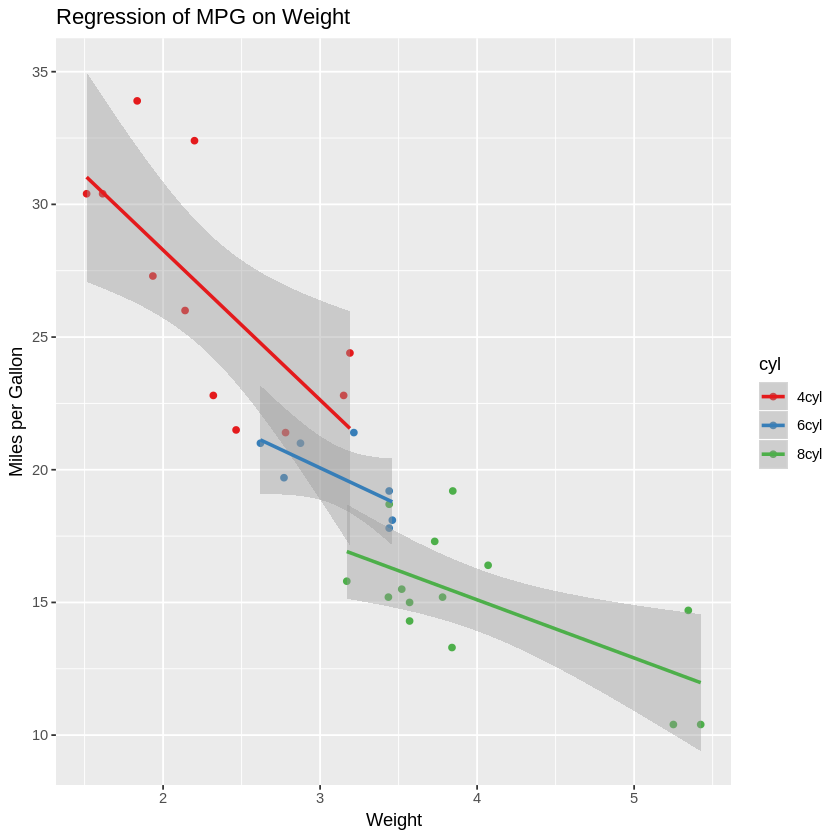

In [6]:
ggplot(mtcars, aes(wt, mpg, color = cyl)) +
  geom_point() +
  geom_smooth(method = "lm", formula = y~x) +
  labs(title = "Regression of MPG on Weight", x = "Weight", y = "Miles per Gallon")

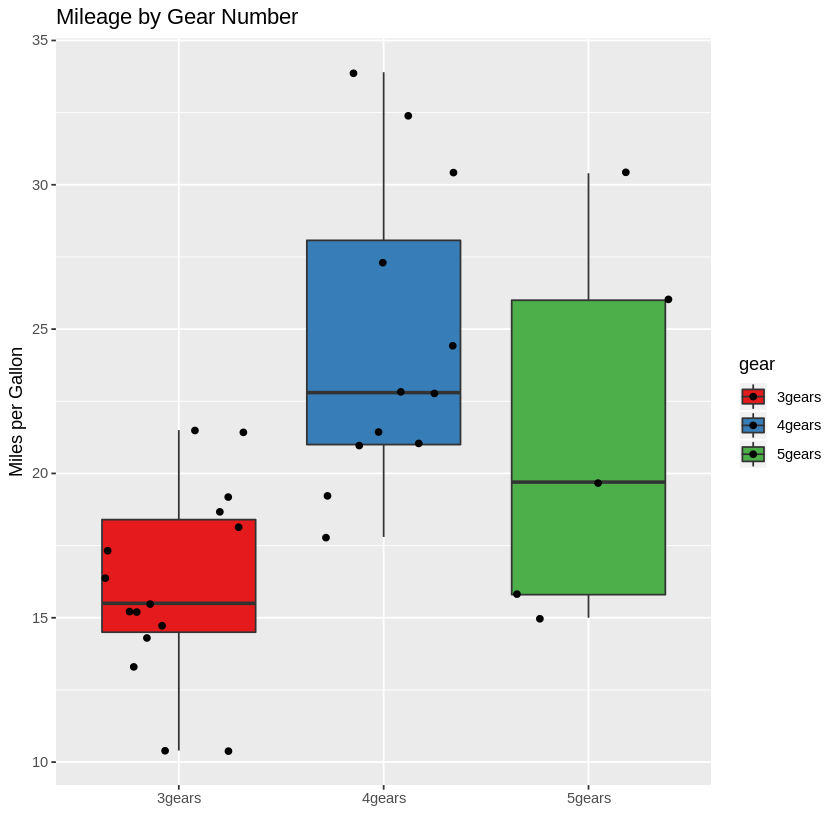

In [7]:
qplot(gear, mpg, data=mtcars, geom=c("boxplot", "jitter"),
   fill=gear, main="Mileage by Gear Number",
   xlab="", ylab="Miles per Gallon")

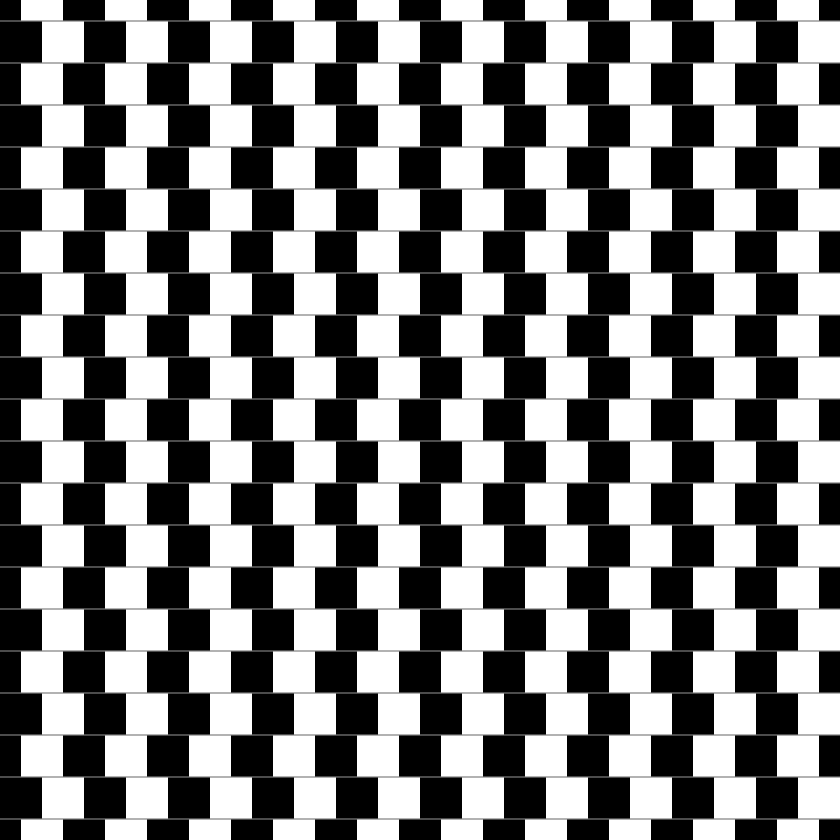

In [8]:
library(grid)
rs <- expand.grid(x = seq(0, 1, 1/10), y = seq(0, 1, 1/10))
grid.rect(rs$x, rs$y, 1/10/2, 1/10/2, gp = gpar(fill = "black", col = NA))
grid.rect(rs$x + 1/10/4, rs$y + 1/10/2, 1/10/2, 1/10/2, gp = gpar(fill = "black", col = NA))
ls <- expand.grid(x = 0:1, y = seq(0, 1, 1/20) - 1/20/2)
grid.polyline(ls$x, ls$y, id = gl(nrow(ls)/2, 2), gp = gpar(col = "grey50", lwd = 1))

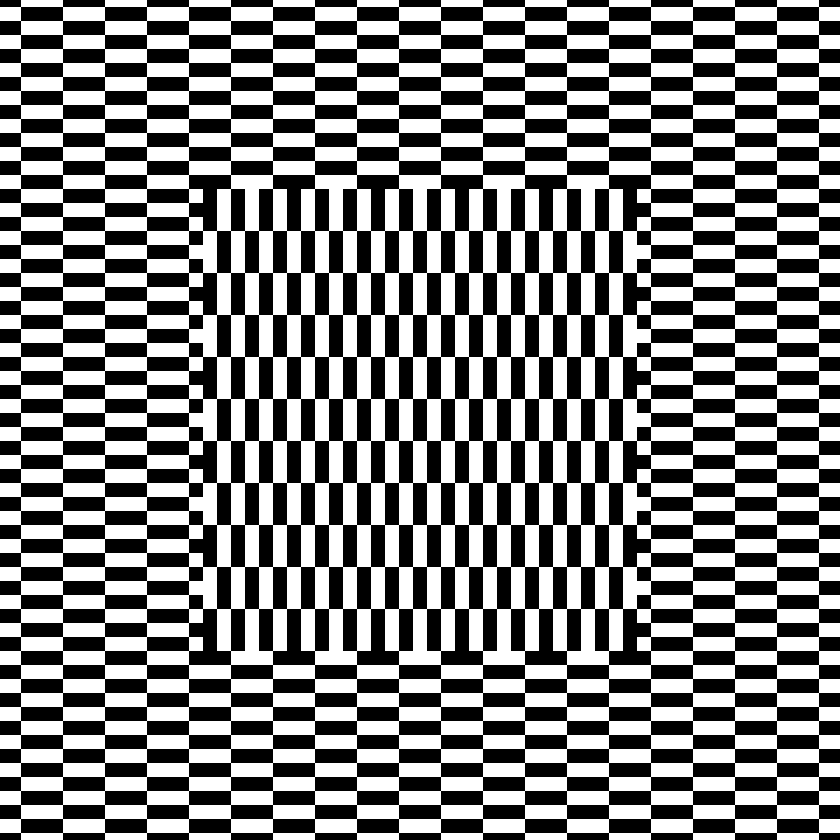

In [9]:
grid.newpage()
nx <- 10; ny <- 30
rs <- expand.grid(x = seq(0, 1, 1/nx/2), y = seq(0, 1, 1/ny/2))
grid.rect(rs$x, rs$y, 1/nx/2, 1/ny/2, gp = gpar(col = NA, fill = c("black", "white")))
rs <- expand.grid(x = seq(0.25, 0.75, 1/nx/2), y = seq(0.25, 0.75, 1/ny/2))
grid.rect(rs$y, rs$x, 1/ny/2, 1/nx/2, gp = gpar(col = NA, fill = c("black", "white")))

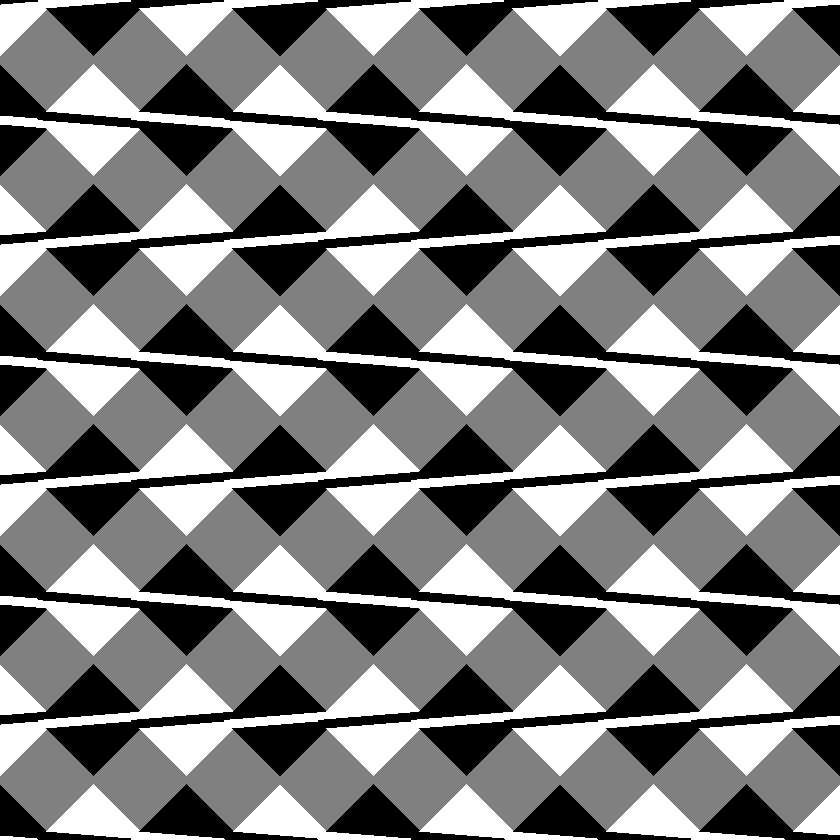

In [10]:
library(plyr)
grid.newpage()
n <- 10; ny <- 8; L <- 0.01; c <- seq(0, 1, length = n); d <- 1.2*diff(c)[1]/2
col <- c("black", "white")
x <- c(c-d, c, c+d, c)
y <- rep(c(0, -d, 0, d), each = n)
w <- c(c-d, c-d+L, c+d, c+d-L)
z <- c(0, L, 0, -L)
ys <- seq(0, 1, length = ny)
grid.rect(gp = gpar(fill = gray(0.5), col = NA))
l_ply(1:ny, function(i) {n
  if (i%%2==0) {
    co <- rev(col)
    z <- -z
  } else {
    co <- col
  }  
  grid.polygon(x, y + ys[i], id = rep(1:n, 4), gp = gpar(fill = co, col = NA))
  grid.polygon(w, rep(z, each = n) + ys[i], id = rep(1:n, 4), gp = gpar(fill = rev(co), col = NA))
})

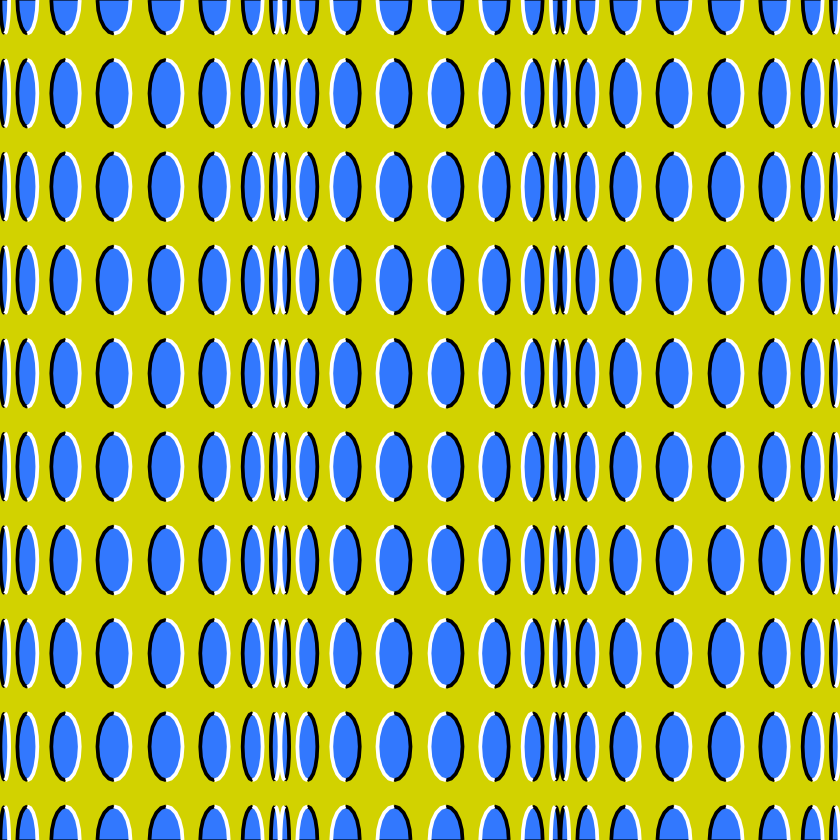

In [11]:
grid.newpage()
No <- 3
wo <- 1/3/2
po <- seq(0, 1, by = wo)[(1:No) * 2]
Nc <- 8
tc <- seq(pi * 11/12, pi * 1/12, len = Nc)
px <- c(outer(wo * cos(tc), po, `+`))
wc <- rep(sin(tc), No)
ag <- rep(1:No, each = Nc)
dc <- 21
th <- seq(0, 2 * pi, len = dc)
grid.rect(gp = gpar(col = NA, fill = "#D2D200"))
for (y0 in seq(0, 1, len = 10)) {
  for (i in seq_along(px)) {
    th <- seq(pi/2, pi/2 + 2 * pi, len = 21)
    if (ag[i]%%2==0) th <- rev(th)
    x <- px[i] + 0.5 * 0.04 * cos(th) * wc[i]
    y <- y0 + 0.04 * sin(th)
    grid.polygon(x, y, gp = gpar(fill = "#3278FE"))
    grid.polyline(x[1:((dc + 1)/2)], y[1:((dc + 1)/2)], gp = gpar(lineend = "butt", lwd = 3, col = gray(0)))
    grid.polyline(x[-(1:((dc - 1)/2))], y[-(1:((dc - 1)/2))], gp = gpar(lineend = "butt", lwd = 3, col = gray(1)))
  }
}

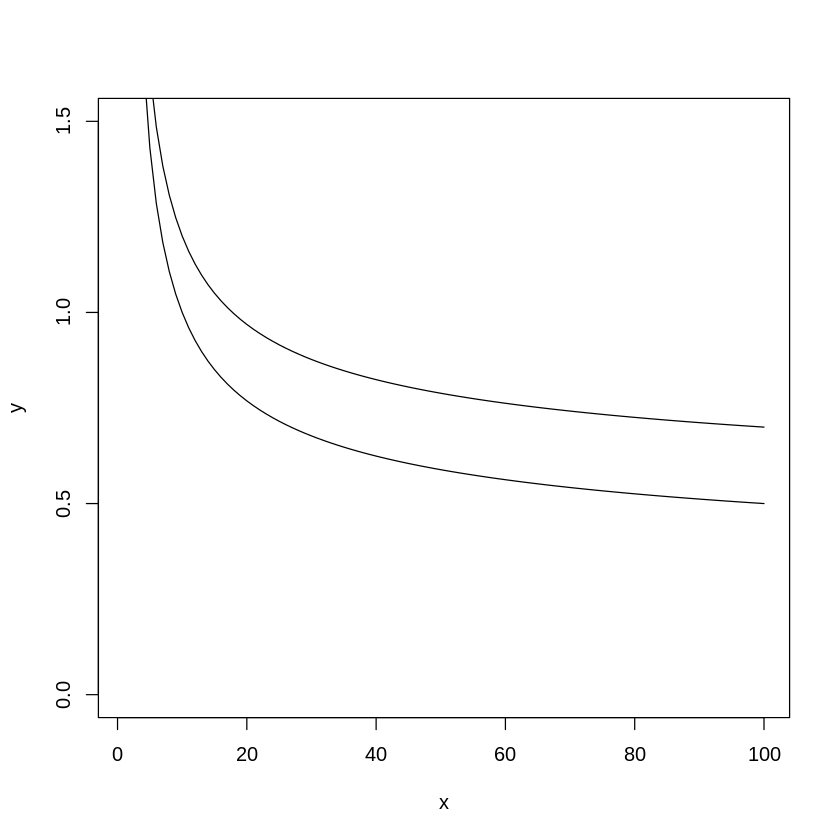

In [12]:
x=1:100
y=1/log10(x)
y2=y+.2
plot(x,y, type='l', ylim=c(0,1.5))
lines(x,y2)

In [13]:
library(ggplot2)
crimes <- data.frame(state = tolower(rownames(USArrests)), USArrests)
library(reshape2) # for melt
crimesm <- melt(crimes, id = 1)
library(maps)


Attaching package: ‘maps’

The following object is masked from ‘package:plyr’:

    ozone



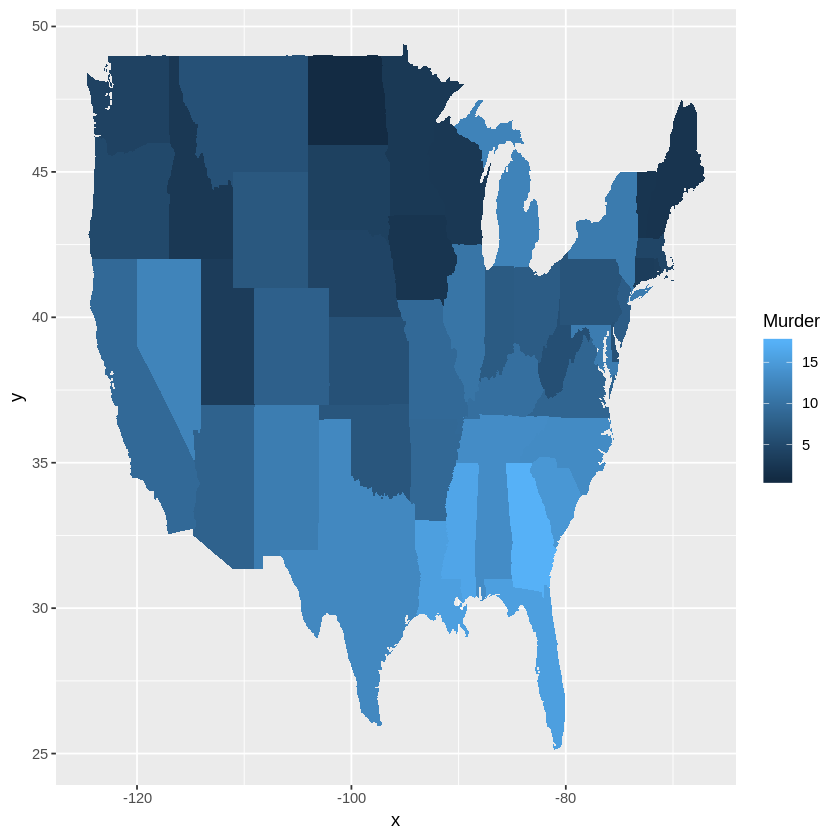

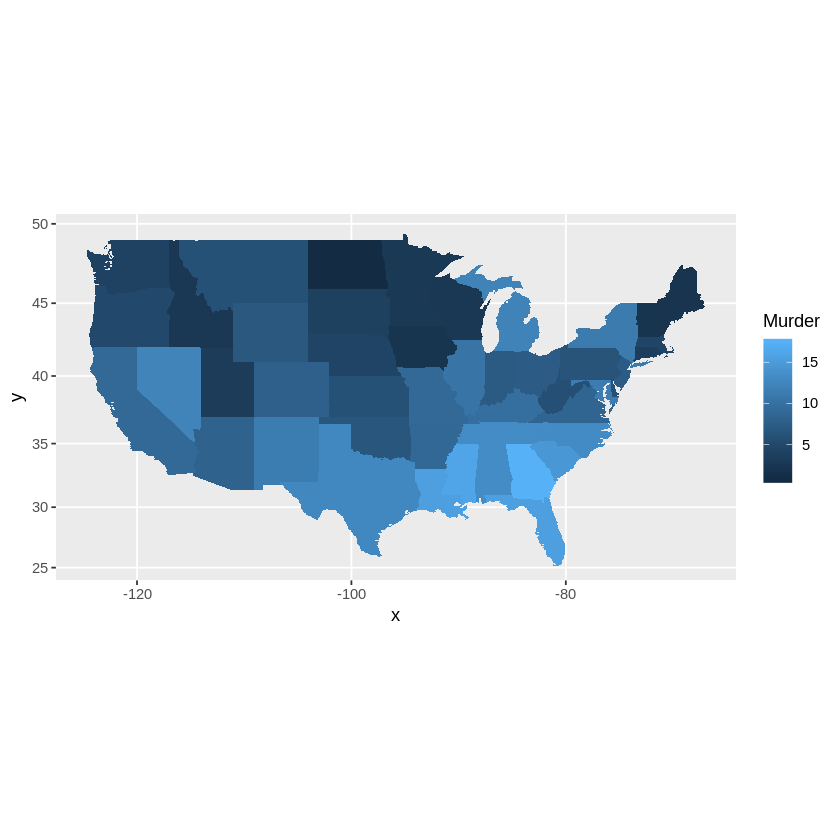

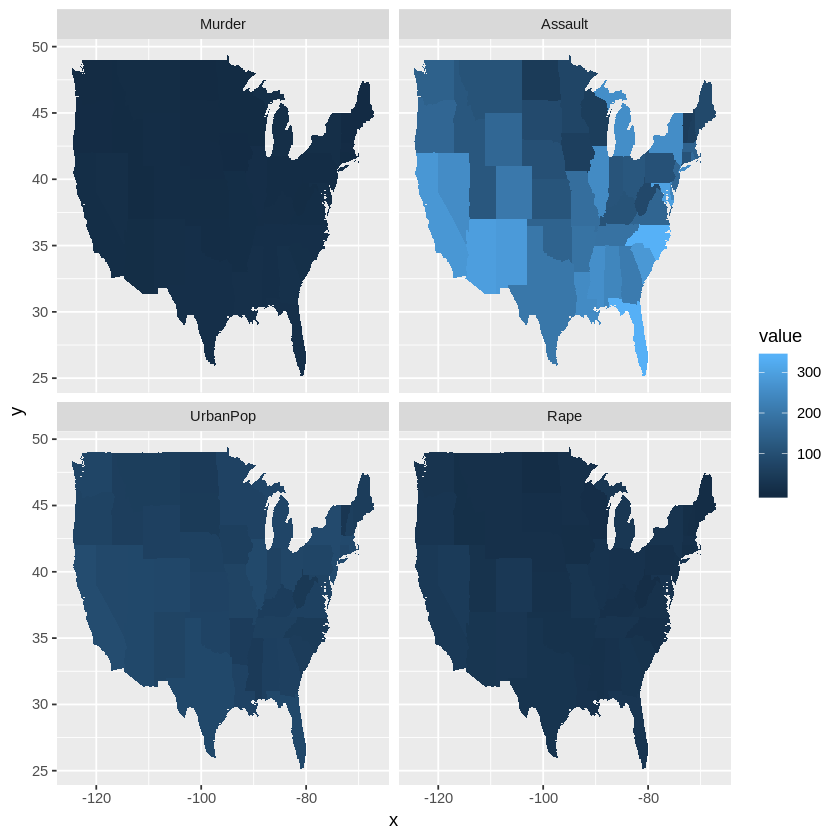

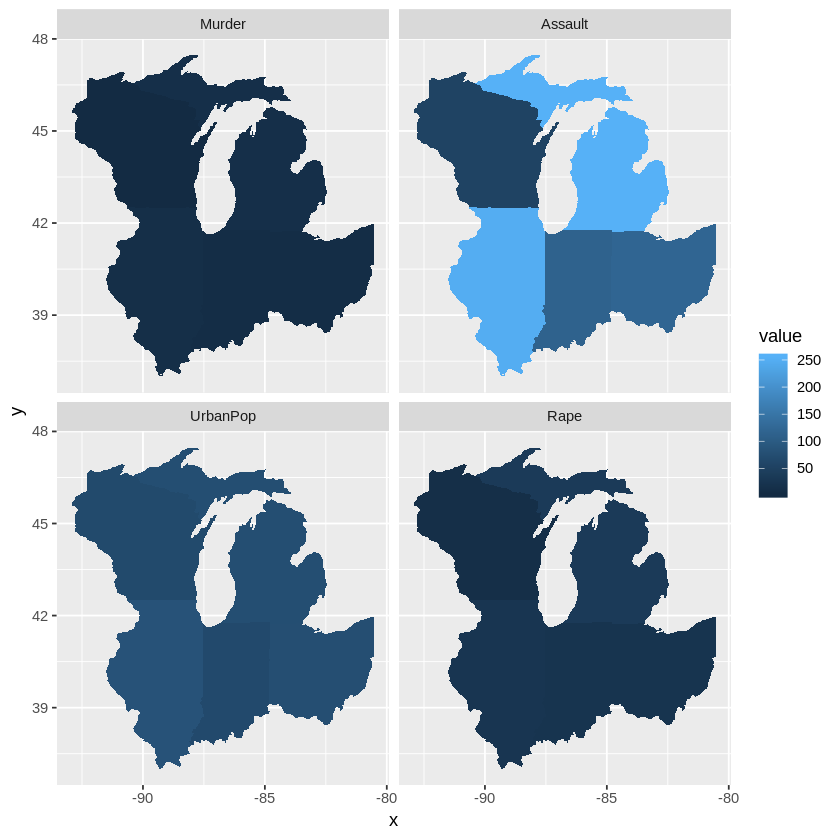

In [14]:
states_map <- map_data("state")
ggplot(crimes, aes(map_id = state)) + geom_map(aes(fill = Murder), map = states_map) + expand_limits(x = states_map$long, y = states_map$lat)
last_plot() + coord_map()
ggplot(crimesm, aes(map_id = state)) + geom_map(aes(fill = value), map = states_map) + expand_limits(x = states_map$long, y = states_map$lat) + facet_wrap( ~ variable)
great_lakes_states = c('michigan', 'illinois', 'ohio', 'wisconsin', 'indiana')
great_lakes_map = subset(states_map, region %in% great_lakes_states)
ggplot(subset(crimesm, state %in% great_lakes_states), aes(map_id = state)) + geom_map(aes(fill = value), map = great_lakes_map) + expand_limits(x=great_lakes_map$long, y=great_lakes_map$lat) + facet_wrap( ~ variable)

In [ ]:
data('mtcars')
mcor <- cor(mtcars)

#Print mcor and round to 2 digits
round(mcor, digits = 2)

In [ ]:
install.packages("corrplot")
library("corrplot")
corrplot(mcor)

In [ ]:
install.packages("igraph")
library("igraph")

In [ ]:
gd <- graph(c(1,2, 2,3, 2,4, 1,4, 5,5, 3,6))
plot(gd)